# Sarcasm Detector

**Introduction**</br>
In this notebook we will try to detect wether a news healdine is sarcastic or not.</br>
This will be done using supervised learning and nlp.</br>
We start with a dataset containing headlines from huffpost and the onions as well as a target columns indicating wether the headline is sarcastic or not.</br>
We will start with a simple logistic regression model and then try to beat it with more advance techniques.

Tasked performed in this notebook:
1.   Import and preprocess the data
2.   Build a simple logistic regression based on TF-IDF
3.   Next we build a CNN model with pre-traind FastText word embeddings




## Get and Load Data

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import pandas as pd
import numpy as np


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
!gdown --id 1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz
To: /content/SarcasmDetect.json
100% 6.06M/6.06M [00:00<00:00, 263MB/s]


In [11]:
df = pd.read_json('./SarcasmDetect.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Remove all records with no headline text

In [12]:
df = df[df['headline'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 894.3+ KB


In [13]:
#checking for class imbalance
df["is_sarcastic"].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [14]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

stop_words = nltk.corpus.stopwords.words('english')
wnl = WordNetLemmatizer()

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
     # pos tag tokenized text
    tagged_tokens = nltk.pos_tag(filtered_tokens)
    # convert raw POS tags into wordnet tags
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    # treat unknown tags as nouns by default
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(),
                                            wordnet.NOUN))
                                for word, tag in tagged_tokens]
    # re-create document from filtered tokens
    lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in new_tagged_tokens)
    return lemmatized_text

In [ ]:
#checking function is working
normalize_document("The quick brown fox jumps over the lazy dog")

'quick brown fox jump lazy dog'

In [ ]:
#creating a new column with pre-processed text
df["clean_headline"] = df["headline"].apply(normalize_document)

In [ ]:
df["clean_headline"].head()

0    thirtysomething scientist unveil doomsday cloc...
1    dem rep totally nails congress fall short gend...
2              eat veggie deliciously different recipe
3             inclement weather prevents liar get work
4    mother come pretty close use word stream corre...
Name: clean_headline, dtype: object

## Logistic Regression based on TF-IDF

In [ ]:
#dropping article link because the domain will introduce data leekage
df = df.drop(columns=["article_link"])

In [ ]:
#Converting text to TF IDF matrix, if you run this in collab the session might crash due to high ram usage
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2', use_idf=True)
tv_matrix = tv.fit_transform(df["clean_headline"])
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,aaa,aaron,aarp,aatish,ab,abandon,abandoned,abaya,abbas,abbey,...,zookeeper,zoolander,zoologist,zoom,zoroastrianism,zsa,zucker,zuckerberg,zuckerbergs,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#we split the data into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tv_matrix, df["is_sarcastic"], test_size=0.3, stratify=df["is_sarcastic"], random_state=42)

In [ ]:
#simple logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='lbfgs', max_iter=1e4)

In [ ]:
#we fit the model and use our test data set to make predictions
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
labels = ['negative', 'positive']
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      4496
           1       0.80      0.73      0.76      4090

    accuracy                           0.78      8586
   macro avg       0.79      0.78      0.78      8586
weighted avg       0.79      0.78      0.78      8586



,negative,positive
negative,3762,734
positive,1120,2970


Here we have a baseline to compare the other model against. It's not too bad but we can do better !

## CNN model using pre-trained FastText embeddings

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
#installing packages
!pip install contractions
!pip install textsearch
!pip install tqdm
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 14.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.5 MB/s eta 0:00:00


In [ ]:
#downloading pre-trained embeddings, you could also use !wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2023-01-13 14:26:39--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  10.4MB/s    in 55s     

2023-01-13 14:27:34 (11.9 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [ ]:
!unzip wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


## Text preprocessing
We do not use the same pre-processing step as we will be using a neural network this time

In [ ]:
import contractions
import re
import tqdm


def normalize_document(doc):
    #remove line break and tabulation
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    #lower case
    doc = doc.lower()
    #fix contractions such as don't => do not
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', ' ', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  

    return doc

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        norm_doc = normalize_document(doc)
        norm_docs.append(norm_doc)

    return norm_docs


In [ ]:
#doing the split before the pre-processing
X_train, X_test, y_train, y_test = train_test_split(df["headline"], df['is_sarcastic'], test_size=0.3, stratify=df['is_sarcastic'], random_state=42)
#we split again in order to have a validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

In [ ]:
X_train = normalize_corpus(X_train.values)
X_test = normalize_corpus(X_test.values)

100%|██████████| 8586/8586 [00:00<00:00, 42586.20it/s]


In [ ]:
#tokenizer defining out of vocabulary token
t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0

In [ ]:
#helper function to load pretrained embeddings
VOCAB_SIZE = len(t.word_index)
EMBED_SIZE = 300
EPOCHS=100
BATCH_SIZE=128

word2idx = t.word_index
FASTTEXT_INIT_EMBEDDINGS_FILE = './wiki-news-300d-1M.vec'


def load_pretrained_embeddings(word_to_index, max_features, embedding_size, embedding_file_path):    
    # inner function to get the word and embedding array
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    # create a dictionary of embeddings where each key is a word and the value is the embedding vector
    embeddings_index = dict(get_coefs(*row.split(" ")) 
                                for row in open(embedding_file_path, encoding="utf8", errors='ignore') 
                                    if len(row)>100)
    # get the mean and standard deviation of all the embeddings
    all_embs = np.stack(embeddings_index.values())
    emb_mean, emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]

    # initialize the embedding matrix with random values based on the mean and std of the embeddings
    nb_words = min(max_features, len(word_to_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_size))

    # iterate through the vocabulary and replace the corresponding row in the embedding matrix
    for word, idx in word_to_index.items():
        if idx >= max_features: 
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None: 
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [ ]:
#pre-trained embeddings
ft_embeddings = load_pretrained_embeddings(word_to_index=word2idx, 
                                           max_features=VOCAB_SIZE, 
                                           embedding_size=EMBED_SIZE, 
                                           embedding_file_path=FASTTEXT_INIT_EMBEDDINGS_FILE)
ft_embeddings.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


(18806, 300)

In [ ]:
#checking word count to see what cut-off to use
df["word_count"] = df["headline"].apply(lambda x: len(x.split()))

(array([2.7702e+04, 9.1400e+02, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  2. ,  16.9,  31.8,  46.7,  61.6,  76.5,  91.4, 106.3, 121.2,
        136.1, 151. ]),
 <a list of 10 Patch objects>)

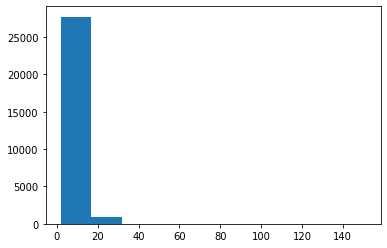

In [ ]:
plt.hist(df["word_count"])

Here we check if there is an obvious cut-off point for the sequence length, however since most document have few word, we will set it to the max length.

In [ ]:
MAX_SEQUENCE_LENGTH = df["word_count"].max()

In [ ]:
#convert text to sequence
X_train_seq = t.texts_to_sequences(X_train)
X_test_seq = t.texts_to_sequences(X_test)
X_val_seq = t.texts_to_sequences(X_val)

In [ ]:
#add padding to each sequence so they are all the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape, X_val.shape

((14023, 151), (8586, 151), (6010, 151))

In [ ]:
X_train

array([[    0,     0,     0, ...,  1921,     7,  9910],
       [    0,     0,     0, ...,     3,  3207,  3208],
       [    0,     0,     0, ...,  5342,  9911,   706],
       ...,
       [    0,     0,     0, ...,     8,  1057, 18805],
       [    0,     0,     0, ...,    40,    47,   959],
       [    0,     0,     0, ...,    60,   197,   423]], dtype=int32)

In [ ]:
#parameter to set to True for the network to run
tf.config.run_functions_eagerly(True)

In [ ]:
#initiate model
model = tf.keras.models.Sequential()

#load embeddings despite using pre-trained embedding we will re-train them during the training process
model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBED_SIZE,
                                    weights=[ft_embeddings],
                                    trainable=True,
                                    input_length=MAX_SEQUENCE_LENGTH))

#convolutions layer
model.add(tf.keras.layers.Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

#flatten convolutions output to transfer it to dense layers
model.add(tf.keras.layers.Flatten())

#dense layers with dropout to correct for overfitting
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 151, 300)          5641800   
                                                                 
 conv1d (Conv1D)             (None, 151, 256)          307456    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 75, 128)           131200    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 64)            3

In [ ]:
# Fit the model
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2, 
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


110/110 [==============================] - 12s 41ms/step - loss: 0.4546 - accuracy: 0.7657 - val_loss: 0.3943 - val_accuracy: 0.8280
Epoch 2/100
110/110 [==============================] - 4s 38ms/step - loss: 0.1850 - accuracy: 0.9298 - val_loss: 0.3610 - val_accuracy: 0.8531
Epoch 3/100
110/110 [==============================] - 4s 38ms/step - loss: 0.0544 - accuracy: 0.9825 - val_loss: 0.5947 - val_accuracy: 0.8416
Epoch 4/100
110/110 [==============================] - 4s 38ms/step - loss: 0.0182 - accuracy: 0.9935 - val_loss: 0.7521 - val_accuracy: 0.8471
Epoch 4: early stopping


In [ ]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test, batch_size=2048, verbose=0).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in predictions]
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 86.79%
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4496
           1       0.85      0.88      0.86      4090

    accuracy                           0.87      8586
   macro avg       0.87      0.87      0.87      8586
weighted avg       0.87      0.87      0.87      8586



,0,1
0,3857,639
1,495,3595


We can see a great improvement in the results. 

## LSTIM model with pre-trained FastText embeddings

In [ ]:
LSTM_DIM = 128
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBED_SIZE,
                                    weights=[ft_embeddings],
                                    trainable=True,
                                    input_length=MAX_SEQUENCE_LENGTH))

model.add(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=False))

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 151, 300)          5641800   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 5,894,729
Trainable params: 5,894,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=2, 
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          shuffle=True,
          callbacks=[es],
          verbose=1)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


110/110 [==============================] - 5s 36ms/step - loss: 0.4378 - accuracy: 0.7873 - val_loss: 0.3383 - val_accuracy: 0.8519
Epoch 2/100
110/110 [==============================] - 4s 36ms/step - loss: 0.1850 - accuracy: 0.9293 - val_loss: 0.3680 - val_accuracy: 0.8449
Epoch 3/100
110/110 [==============================] - 4s 36ms/step - loss: 0.0735 - accuracy: 0.9748 - val_loss: 0.4430 - val_accuracy: 0.8396
Epoch 3: early stopping


In [ ]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test, batch_size=2048, verbose=0).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in predictions]
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 85.49%
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4496
           1       0.87      0.81      0.84      4090

    accuracy                           0.85      8586
   macro avg       0.86      0.85      0.85      8586
weighted avg       0.86      0.85      0.85      8586



,0,1
0,4013,483
1,763,3327


The model have pretty similar performances, we will try a different approach to see if we can boost the performances.

## BERT transformer

In [ ]:
import transformers

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def create_bert_input_features(tokenizer, docs, max_seq_length):
    #initialize empty lists to store input features
    all_ids, all_masks, all_segments= [], [], []
    for doc in tqdm.tqdm(docs, desc="Converting docs to features"):
        
        # tokenize the input text
        tokens = tokenizer.tokenize(doc)
        
        # truncate tokens if they exceed the maximum sequence length
        if len(tokens) > max_seq_length-2:
            tokens = tokens[0 : (max_seq_length-2)]
        
        # add special tokens to the input
        tokens = ['[CLS]'] + tokens + ['[SEP]']

        # convert tokens to ids
        ids = tokenizer.convert_tokens_to_ids(tokens)

        # create a list of masks with the same length as ids
        masks = [1] * len(ids) # [1,1,1.....] # < 500 ones
        
        # Zero-pad up to the sequence length.
        while len(ids) < max_seq_length:
            ids.append(0)
            masks.append(0)
        
        # create a list of segments with the maximum sequence length 
        segments = [0] * max_seq_length # [0,0,0...] # 500 zeros

        #append the ids, masks, and segments to the corresponding lists
        all_ids.append(ids)
        all_masks.append(masks)
        all_segments.append(segments)
    
    # create an array of all_ids, all_masks, and all_segments
    encoded = np.array([all_ids, all_masks, all_segments])
    
    return encoded

In [ ]:
#resetting the split from original data
X_train, X_test, y_train, y_test = train_test_split(df["headline"], df['is_sarcastic'], test_size=0.3, stratify=df['is_sarcastic'], random_state=42)
#we split again in order to have a validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

In [ ]:
#cleaning with the same function as before
X_train = normalize_corpus(X_train.values)
X_test = normalize_corpus(X_test.values)

100%|██████████| 8586/8586 [00:00<00:00, 59802.11it/s]


In [ ]:


inp_id = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32', name="bert_input_ids")
inp_mask = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32', name="bert_input_masks")
inp_segment = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32', name="bert_segment_ids")
inputs = [inp_id, inp_mask, inp_segment]

#BERT model
hidden_state = transformers.TFBertModel.from_pretrained('bert-base-uncased')(inputs)
pooled_output = hidden_state[1] 

#Dense layer with dropout
dense1 = tf.keras.layers.Dense(256, activation='relu')(pooled_output) 
drop1 = tf.keras.layers.Dropout(0.25)(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(0.25)(dense2)

output = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model = tf.keras.Model(inputs=inputs, outputs=output)

model.compile(optimizer=tf.optimizers.Adam(learning_rate=2e-5, 
                                           epsilon=1e-08), 
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 bert_input_ids (InputLayer)    [(None, 151)]        0           []                               
                                                                                                  
 bert_input_masks (InputLayer)  [(None, 151)]        0           []                               
                                                                                                  
 bert_segment_ids (InputLayer)  [(None, 151)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['bert_input_ids[0][0]',         
                                thPoolingAndCrossAt               'bert_input_masks[0][0]',   

In [ ]:
train_features_ids, train_features_masks, train_features_segments = create_bert_input_features(tokenizer, 
                                                                                               X_train, 
                                                                                               max_seq_length=MAX_SEQUENCE_LENGTH)

val_features_ids, val_features_masks, val_features_segments = create_bert_input_features(tokenizer, 
                                                                                         X_val, 
                                                                                         max_seq_length=MAX_SEQUENCE_LENGTH)


print('Train Features:', train_features_ids.shape, train_features_masks.shape, train_features_segments.shape)
print('Val Features:', val_features_ids.shape, val_features_masks.shape, val_features_segments.shape)

Converting docs to features: 100%|██████████| 6010/6010 [00:02<00:00, 2926.66it/s]


Train Features: (14023, 151) (14023, 151) (14023, 151)
Val Features: (6010, 151) (6010, 151) (6010, 151)


In [ ]:
#BERT is a heavy model which take a long time to run, if you have a high performance GPU you can increase the batch_size to try and get better performance
#If you want a lighter model you could try distilBERT

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      patience=1,
                                      restore_best_weights=True,
                                      verbose=1)
model.fit([train_features_ids, 
           train_features_masks, 
           train_features_segments], y_train.to_numpy(), 
          validation_data=([val_features_ids, 
                            val_features_masks, 
                            val_features_segments], y_val.to_numpy()),
          epochs=4, 
          batch_size=13, #setting batch size to 13 otherwise google collab runs out of memory 
          callbacks=[es],
          shuffle=True,
          verbose=1)

Epoch 1/4


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1079/1079 [==============================] - 635s 588ms/step - loss: 0.3623 - accuracy: 0.8356 - val_loss: 0.2626 - val_accuracy: 0.9005
Epoch 2/4
1079/1079 [==============================] - 632s 586ms/step - loss: 0.1617 - accuracy: 0.9411 - val_loss: 0.2407 - val_accuracy: 0.9023
Epoch 3/4
1079/1079 [==============================] - 629s 583ms/step - loss: 0.0633 - accuracy: 0.9786 - val_loss: 0.3973 - val_accuracy: 0.8794
Epoch 3: early stopping


In [ ]:
model.save_weights('bert_ft_wts.h5')

In [ ]:
test_features_ids, test_features_masks, test_features_segments = create_bert_input_features(tokenizer, 
                                                                                            X_test, 
                                                                                            max_seq_length=MAX_SEQUENCE_LENGTH)
print('Test Features:', test_features_ids.shape, test_features_masks.shape, test_features_segments.shape)

Converting docs to features: 100%|██████████| 8586/8586 [00:02<00:00, 3003.24it/s]


Test Features: (8586, 151) (8586, 151) (8586, 151)


In [ ]:
predictions = [1 if pr > 0.5 else 0 
                   for pr in model.predict([test_features_ids, 
                                            test_features_masks, 
                                            test_features_segments], verbose=0).ravel()]

print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 90.89%
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4496
           1       0.93      0.88      0.90      4090

    accuracy                           0.91      8586
   macro avg       0.91      0.91      0.91      8586
weighted avg       0.91      0.91      0.91      8586



,0,1
0,4208,288
1,494,3596


BERT gives the best performance so far. It would be interesting to run it with a bigger batch size to see if performance can be improved.